In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 用于回归的线性模型

## 数学公式
$$
\hat{y} = w[0] \cdot x[0] + w[1] \cdot x[1] + \cdots + w[p] \cdot x[p] + b
$$

这里x[0]到x[p] 表示单个数据点的特征（本例中特征个数为p+1）， w和b是学习模型的 参数，ŷ是模型的预测结果。

对于单一特征的数据集，公式如下： ŷ = w[0] * x[0] + b


> 你可能还记得，这就是高中数学里的直线方程。这里w[0]是斜率，b是y轴偏移。对于有 更多特征的数据集，w包含沿每个特征坐标轴的斜率。

什么意思

这句话的意思是：

> **每个权重 w[i] 表示：当第 i 个特征变化 1 单位时，预测结果 y^​ 会变化多少。**

也就是：

- w[0] ：面积每增加 1 平米，房价上涨 w[0] 万元
- w[1] ：房龄每增加 1 年，房价下降 ∣w[1]∣ 万元（如果是负数）
- w[2] ：离地铁近 1 公里，房价涨 w[2] 万元

这些 w[i] 就像是在各个方向上的“坡度”或“敏感度”。




## Linear Regression
线性回归，或者普通最小二乘法（ordinary least squares，OLS），是回归问题最简单也最经
典的线性方法。

线性回归寻找参数w和b，使得对训练集的预测值与真实的回归目标值y
之间的均方误差最小。

均方误差（mean squared error）是预测值与真实值之差的平方和除
以样本数。线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。

w[0]: 0.393906  b: -0.031804


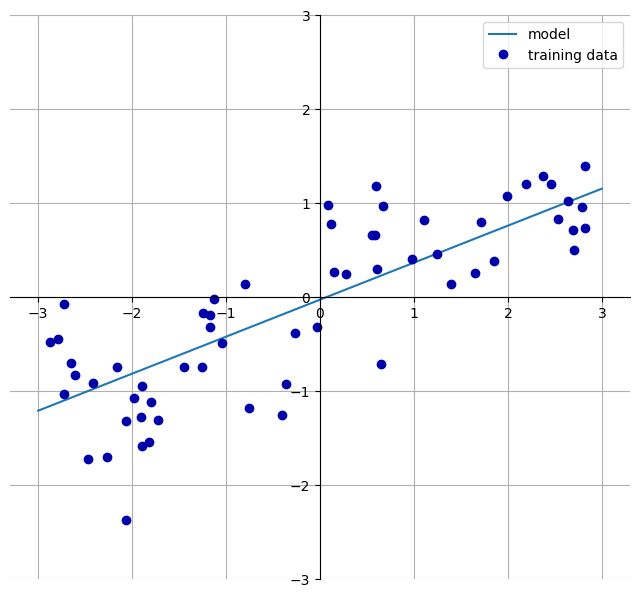

In [3]:
mglearn.plots.plot_linear_regression_wave()

### 普通最小二乘法（Ordinary Least Squares, OLS）
最经典的线性回归方法。

#### 🔹 数学原理：
找到一组权重 $ \mathbf{w} $ 和偏置 $ b $，使得真实值与预测值之间的**均方误差（MSE）最小**：

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - (\mathbf{w}^T\mathbf{x}_i + b))^2
$$

#### 🔹 优点：
- 计算快
- 可解释性强（每个特征的系数告诉你它对结果的影响）

#### 🔹 缺点：
- 容易过拟合（尤其当特征多时）
- 对异常值敏感


### 生成模型

In [4]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

“斜率”参数（w，也叫作权重或系数）被保存在coef_属性中，而偏移或截距（b）被保
存在intercept_ 属性中：

In [5]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


你可能注意到了coef_和intercept_结尾处奇怪的下划线。scikit-learn
总是将从训练数据中得出的值保存在以下划线结尾的属性中。这是为了将其
与用户设置的参数区分开。

intercept_ 属性是一个浮点数，而coef_属性是一个NumPy数组，每个元素对应一个输
入特征。由于wave数据集中只有一个输入特征，所以lr.coef_中只有一个元素。

### 看看测试集和训练集性能

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


 R2 约为0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近。
这说明可能存在欠拟合，而不是过拟合。对于这个一维数据集来说，过拟合的风险很小，
因为模型非常简单（或受限）

然而，对于更高维的数据集（即有大量特征的数据集），线
性模型将变得更加强大，过拟合的可能性也会变大。

### 看看在Boston房价数据集上的表现

In [7]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


我们在训练集上的预测非常准确，但测试集
上的R2要低很多,说明过拟合了

因此我们应该试图找到一个可以控
制复杂度的模型。标准线性回归最常用的替代方法之一就是岭回归（ridge regression）

## Ridge regression

岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。

但在岭回归中，对系数（w）的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加
约束。

我们还希望系数尽量小。换句话说，w的所有元素都应接近于0。直观上来看，这
意味着每个特征对输出的影响应尽可能小（即斜率很小），同时仍给出很好的预测结果。


这种约束是所谓正则化（regularization）的一个例子。正则化是指对模型做显式约束，以   
避免过拟合。岭回归用到的这种被称为L2正则化。

### 在波士顿上的效果：

In [9]:
from sklearn.linear_model import Ridge 
ridge = Ridge().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


可以看出，Ridge在训练集上的分数要低于LinearRegression，但在测试集上的分数更高。
这和我们的预期一致。线性回归对数据存在过拟合。Ridge是一种约束更强的模型，所以
更不容易过拟合。

复杂度更小的模型意味着在训练集上的性能更差，但泛化性能更好。

### 理解正则化的影响
Ridge 模型在模型的简单性（系数都接近于0）与训练集性能之间做出权衡。简单性和训练
集性能二者对于模型的重要程度可以由用户通过设置alpha参数来指定。

在前面的例子中，
我们用的是默认参数alpha=1.0。但没有理由认为这会给出最佳权衡。alpha的最佳设定
值取决于用到的具体数据集。

增大alpha会使得系数更加趋向于0，从而降低训练集性能，
但可能会提高泛化性能。例如

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


对于非常小的alpha值，
系数几乎没有受到限制

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


我们还可以查看alpha取不同值时模型的coef_属性，从而更加定性地理解alpha参数是
如何改变模型的。更大的alpha表示约束更强的模型，所以我们预计大alpha对应的coef_
元素比小alpha对应的coef_元素要小。这一点可以在图2-12中得到证实：

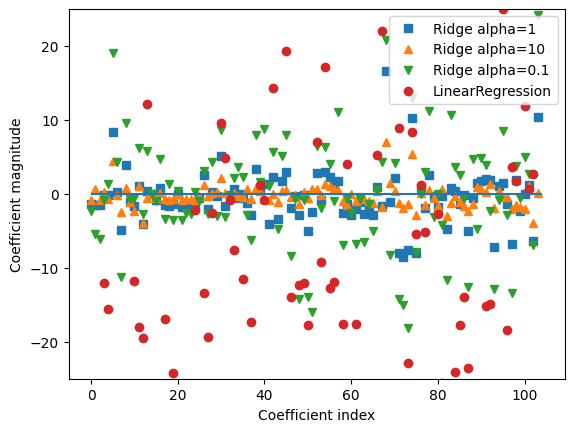

In [12]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10") 
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1") 
plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25, 25) 
plt.legend()

对于没有做正则化的线性回归（即alpha=0），点的范围很大，许多点都超
出了图像的范围。

还有一种方法可以用来理解正则化的影响，就是固定alpha值，但改变训练数据量。

我们对波士顿房价数据集做二次抽样，并在数据量逐渐增加的子数据集上分
别对LinearRegression 和 Ridge(alpha=1) 两个模型进行评估（将模型性能作为数据集大小
的函数进行绘图，这样的图像叫作学习曲线）：

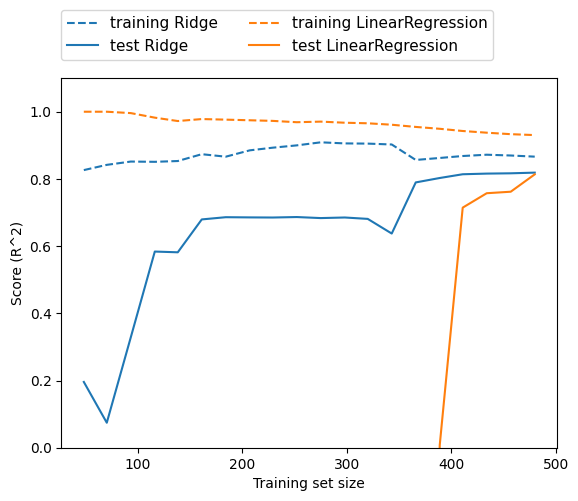

In [13]:
mglearn.plots.plot_ridge_n_samples()

## ridge and linear
正如所预计的那样，无论是岭回归还是线性回归，所有数据集大小对应的训练分数都要高
于测试分数。

由于岭回归是正则化的，因此它的训练分数要整体低于线性回归的训练分
数。但岭回归的测试分数要更高，特别是对较小的子数据集。

如果少于400个数据点，线
性回归学不到任何内容。随着模型可用的数据越来越多，两个模型的性能都在提升，最终
线性回归的性能追上了岭回归。

这里要记住的是，如果有足够多的训练数据，正则化变得
不那么重要，并且岭回归和线性回归将具有相同的性能


## lasso
与岭回归相同，使用lasso也是约束系
数使其接近于0，但用到的方法不同，叫作L1正则化。

L1正则化的结果是，使用lasso时
某些系数刚好为0。这说明某些特征被模型完全忽略。这可以看作是一种自动化的特征选
择。某些系数刚好为0，这样模型更容易解释，也可以呈现模型最重要的特征。

### 还是波士顿

In [14]:
from sklearn.linear_model import Lasso 
lasso = Lasso().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


如你所见，Lasso在训练集与测试集上的表现都很差。这表示存在欠拟合，我们发现模型
只用到了105个特征中的4个。

与Ridge类似，Lasso也有一个正则化参数alpha，可以控
制系数趋向于0的强度。在上一个例子中，我们用的是默认值alpha=1.0。

为了降低欠拟
合，我们尝试减小alpha。这么做的同时，我们还需要增加max_iter的值（运行迭代的最
大次数）：

In [15]:
# 我们增大max_iter的值，否则模型会警告我们，说应该增大max_iter 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


alpha 值变小，我们可以拟合一个更复杂的模型，在训练集和测试集上的表现也更好。模
型性能比使用Ridge时略好一点，而且我们只用到了105个特征中的33个。这样模型可能
更容易理解。


但如果把alpha设得太小，那么就会消除正则化的效果，并出现过拟合，得到与
LinearRegression 类似的结果：

In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


## lasso and ridge

Text(0, 0.5, 'Coefficient magnitude')

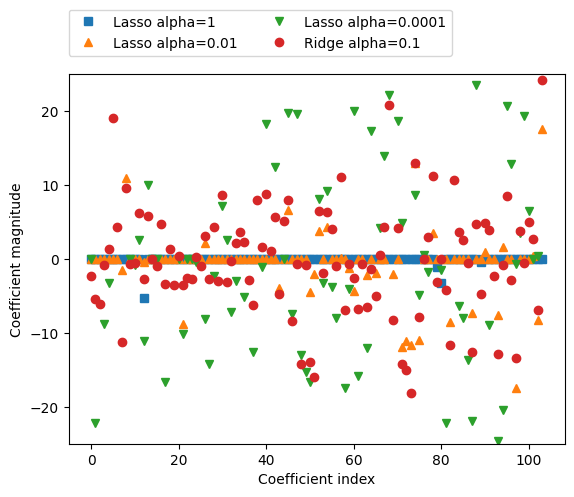

In [17]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1") 
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001") 
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 
plt.legend(ncol=2, loc=(0, 1.05)) 
plt.ylim(-25, 25) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")

在alpha=1 时，我们发现不仅大部分系数都是0（我们已经知道这一点），而且其他系
数也都很小。将alpha减小至0.01，我们得到图中向上的三角形，大部分特征等于0。
alpha=0.0001 时，我们得到正则化很弱的模型，大部分系数都不为0，并且还很大。

在实践中，在两个模型中一般首选岭回归。但如果特征很多，你认为只有其中几个是重要
的，那么选择Lasso可能更好。同样，如果你想要一个容易解释的模型，Lasso可以给出
更容易理解的模型，因为它只选择了一部分输入特征。

# 用于分类的线性模型

目标：预测一个**连续值**，比如房价、温度、销量等。

## 数学公式

$$
\hat{y} = w[0] \cdot x[0] + w[1] \cdot x[1] + \cdots + w[p] \cdot x[p] + b > 0
$$

这看起来很像**线性回归**的公式，对吧？  
但这里不是预测数值，而是做**分类决策**。

--------------

我们不关心 $\hat{y}$ 的具体值是多少，只关心它是不是大于 0：

- 如果 $\hat{y} > 0$ → 预测为 **+1 类**
- 如果 $\hat{y} < 0$ → 预测为 **-1 类**

👉 这个“0”就是**阈值**，就像一道墙，把数据分两边。


## LogisticRegression and LinearSVC

我们可以将LogisticRegression 和 LinearSVC 模型应用到forge 数据集上，并将线性模型
找到的决策边界可视化（图2-15）：

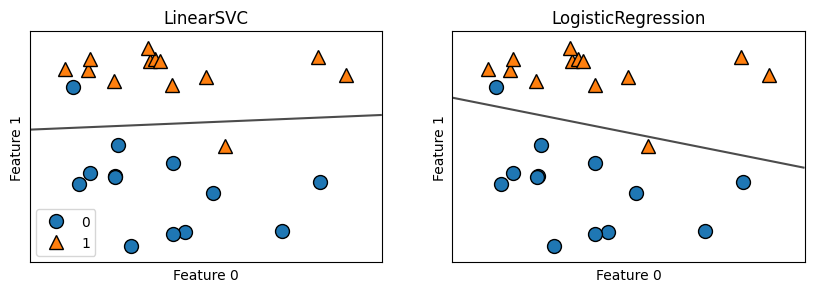

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
X, y = mglearn.datasets.make_forge() 
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                    ax=ax, alpha=.7) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1") 
axes[0].legend()

对于每个分类器而言，位于
黑线上方的新数据点都会被划为类别1，而在黑线下方的点都会被划为类别0。

两个模型得到了相似的决策边界。注意，两个模型中都有两个点的分类是错误的。两个模
型都默认使用L2正则化，就像Ridge对回归所做的那样。


对于LogisticRegression 和 LinearSVC，决定正则化强度的权衡参数叫作C。C值越
大，对应的正则化越弱。

换句话说，如果参数C值较大，那么LogisticRegression和
LinearSVC 将尽可能将训练集拟合到最好，而如果C值较小，那么模型更强调使系数向量
（w）接近于0。

参数C的作用还有另一个有趣之处。较小的C值可以让算法尽量适应“大多数”数据点，
而较大的C值更强调每个数据点都分类正确的重要性。下面是使用LinearSVC的图示

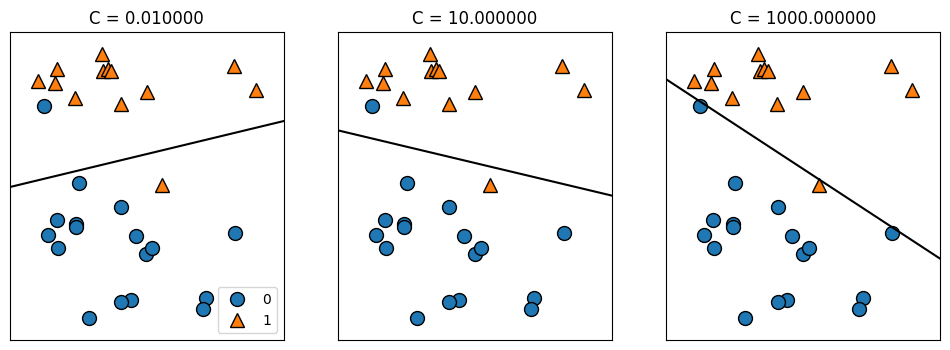

In [19]:
 mglearn.plots.plot_linear_svc_regularization()

在左侧的图中，C值很小，对应强正则化。大部分属于类别0的点都位于底部，大部分属
于类别1的点都位于顶部。强正则化的模型会选择一条相对水平的线，有两个点分类错
误。

在右侧的图中，模型的C值非常大，使得决策边界的斜率也很大，现在模型对类
别0中所有点的分类都是正确的。类别1中仍有一个点分类错误，这是因为对这个数据集
来说，不可能用一条直线将所有点都分类正确。右侧图中的模型尽量使所有点的分类都正
确，但可能无法掌握类别的整体分布。换句话说，这个模型很可能过拟合。


与回归的情况类似，用于分类的线性模型在低维空间中看起来可能非常受限，决策边界只
能是直线或平面。同样，在高维空间中，用于分类的线性模型变得非常强大，当考虑更多
特征时，避免过拟合变得越来越重要。



## Breast Cancer using LogisticRegression

In [57]:
# 加载数据
data = load_breast_cancer()

# 查看基本信息
print("数据集名称：", data['DESCR'][:300] + "...\n")
print("特征数量：", data.data.shape[1])  # 30个特征
print("样本数量：", data.data.shape[0])  # 569个病人
print("类别：", data.target_names)      # ['malignant' 'benign']
print("特征名示例：")
for i in range(5):
    print(f"  - {data.feature_names[i]}")

数据集名称： .. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of dista...

特征数量： 30
样本数量： 569
类别： ['malignant' 'benign']
特征名示例：
  - mean radius
  - mean texture
  - mean perimeter
  - mean area
  - mean smoothness


In [58]:
# 划分训练集
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) 

# 创建并训练模型
logreg = LogisticRegression(max_iter = 10000) # 增加最大迭代次数
logreg.fit(X_train, y_train) 

# 评估
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# 查看详细分类报告
y_pred = logreg.predict(X_test)
print("\nclassification report:")
print(classification_report(y_test, y_pred))

Training set score: 0.958
Test set score: 0.958

classification report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### 解读分类报告
Precision： 预测为正类中，有多少是真正的正类？
“我预测是恶性，到底对了多少？”

Recall（召回率） ： 所有真正的正类中，我找出了多少？
 “所有恶性病例中，我有没有漏掉？”

F1-score： Precision 和 Recall 的调和平均数，综合评价

Support：每个类别的真实样本数量（即“真实标签”中有多少）

Macro Avg（宏平均）：对每个类别的指标取算术平均，不考虑类别大小。

Weighted Avg（加权平均）：按照每个类别的样本数量进行加权平均。


### 为什么会出现“收敛失败”？

原因：

默认情况下，LogisticRegression 最大迭代次数是 max_iter=100

数据特征较多（30个），样本量适中（569条），可能导致优化过程需要更多步数才能收敛

解决方案：logreg = LogisticRegression(max_iter = 10000)增大迭代次数

## 增大C值
C=1 的默认值给出了相当好的性能，在训练集和测试集上都达到95%的精度。但由于训练
集和测试集的性能非常接近，所以模型很可能是欠拟合的。我们尝试增大C来拟合一个更
灵活的模型：

In [51]:
logreg100 = LogisticRegression(C=100, max_iter = 100000)
logreg100.fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


依然要增大迭代次数，要更加大
因为C=100，是一个较大的值（意味着更弱的正则化），所以模型更容易过拟合，也更难收敛

使用C=100可以得到更高的训练集精度，也得到了稍高的测试集精度，这也证实了我们的
直觉，即更复杂的模型应该性能更好。

C值大，性能好，正则化弱

## 减小C值

In [52]:
logreg001 = LogisticRegression(C=0.01, max_iter = 10000).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


训练集和测试集的精度都
比采用默认参数时更小。

最后，来看一下正则化参数C取三个不同的值时模型学到的系数（图2-17）：

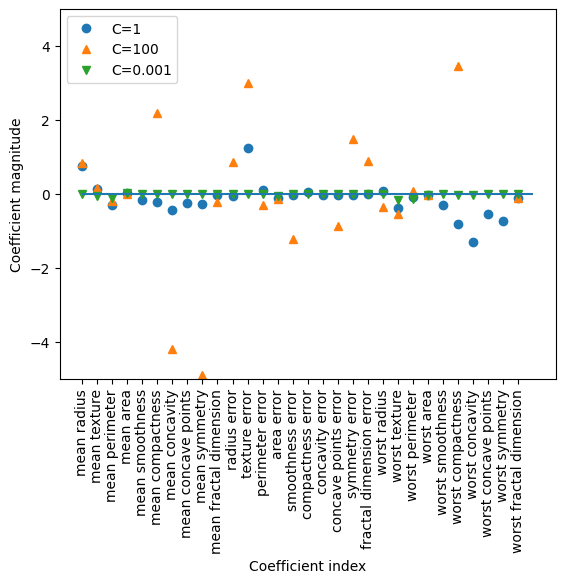

In [53]:
plt.plot(logreg.coef_.T, 'o', label="C=1") 
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()

# 用于多分类的线性模型

许多线性分类模型只适用于二分类问题，不能轻易推广到多类别问题（除了Logistic回
归）。

将二分类算法推广到多分类算法的一种常见方法是“一对其余”（one-vs.-rest）方
法。

在“一对其余”方法中，对每个类别都学习一个二分类模型，将这个类别与所有其
他类别尽量分开，这样就生成了与类别个数一样多的二分类模型。在测试点上运行所有
二类分类器来进行预测。在对应类别上分数最高的分类器“胜出”，将这个类别标签返回
作为预测结果。

## 三分类
我们将“一对其余”方法应用在一个简单的三分类数据集上。我们用到了一个二维数据
集，每个类别的数据都是从一个高斯分布中采样得出的

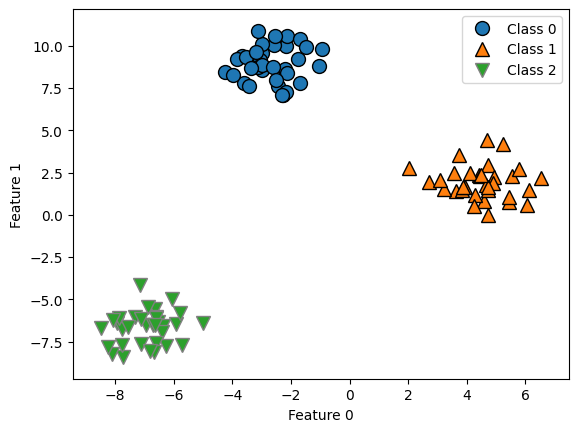

In [62]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(random_state=42) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(["Class 0", "Class 1", "Class 2"])

### 训练一个LinearSVC分类器
现在，在这个数据集上训练一个LinearSVC分类器：

In [64]:
linear_svm = LinearSVC().fit(X, y) 
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


我们看到，coef_的形状是(3, 2)，说明coef_每行包含三个类别之一的系数向量，每列
包含某个特征（这个数据集有2个特征）对应的系数值。现在intercept_是一维数组，保
存每个类别的截距。

### 三个“一对其余”分类器学到的决策边界
我们将这3个二类分类器给出的直线可视化（图2-20）：

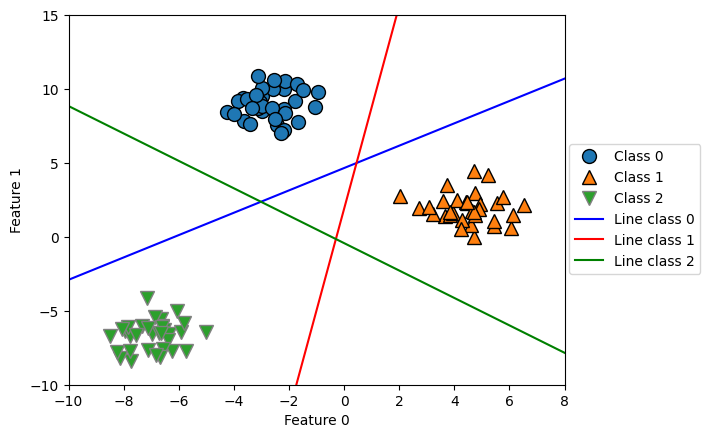

In [66]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
plt.ylim(-10, 15) 
plt.xlim(-10, 8) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 
            'Line class 2'], loc=(1.01, 0.3))

图像中间的三角形区域属于哪一个类别呢，3个二类分类器都将这一区域内的点划为
“其余”。这里的点应该划归到哪一个类别呢？答案是分类方程结果最大的那个类别，即最
接近的那条线对应的类别。

### 三个“一对其余”分类器得到的多分类决策边界
下面的例子（图2-21）给出了二维空间中所有区域的预测结果：

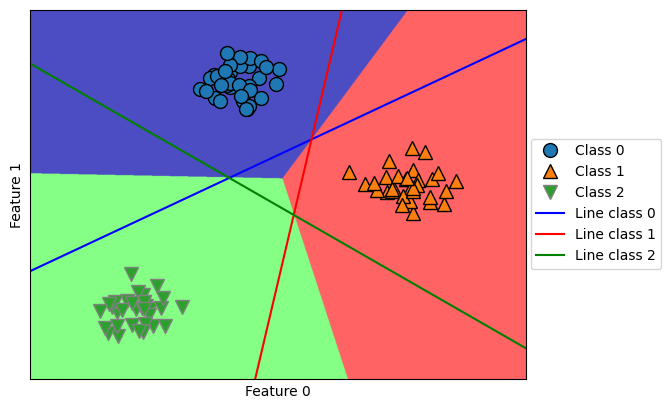

In [70]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 
                'Line class 2'], loc=(1.01, 0.3)) 
    plt.xlabel("Feature 0") 
    plt.ylabel("Feature 1")